In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [13]:
df = pd.read_csv('data.csv')
df['volume_residential'] = df['volume_residential'].str.replace(',', '').astype(float)
df = df.dropna(subset=['gdp'])

In [14]:
X = df[["inflation rate", "interest rate", "gdp", "unemployment"]]
y = df["close_tower"].values


In [15]:
X = sm.add_constant(X)

In [16]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     13.72
Date:                Fri, 21 Mar 2025   Prob (F-statistic):           1.51e-06
Time:                        19:18:12   Log-Likelihood:                -149.81
No. Observations:                  36   AIC:                             309.6
Df Residuals:                      31   BIC:                             317.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -68.4049    161.693     -0.

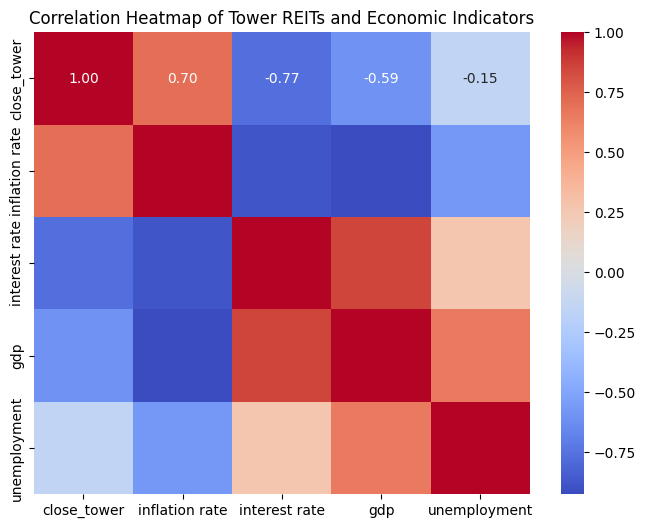

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(df[["close_tower", "inflation rate", "interest rate", "gdp", "unemployment"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Tower REITs and Economic Indicators")
plt.show()


In [18]:
X_vif = df[['inflation rate', 'interest rate', 'gdp', 'unemployment']]
X_vif = sm.add_constant(X_vif)

vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)

         Variable          VIF
0           const  3362.224150
1  inflation rate    10.828465
2   interest rate    12.833872
3             gdp    13.728864
4    unemployment     4.794082


In [19]:
correlation = df['inflation rate'].corr(df['interest rate'])
print(f"Correlation between inflation rate and interest rate: {correlation}")

Correlation between inflation rate and interest rate: -0.8846558276286167


In [20]:
correlation = df['gdp'].corr(df['unemployment'])
print(f"Correlation between GDP and Unemployment Rate: {correlation}")

Correlation between GDP and Unemployment Rate: 0.6579422703182489


In [21]:
correlation = df['close_tower'].corr(df['unemployment'])
print(f"Correlation between Tower REITs and Unemployment Rate: {correlation}")

Correlation between Tower REITs and Unemployment Rate: -0.1462657840277971


In [22]:
correlation = df['close_tower'].corr(df['gdp'])
print(f"Correlation between Tower REITs and GDP: {correlation}")

Correlation between Tower REITs and GDP: -0.5933808852263951
